### 시황을 고려한 투자의 중요성
- 증시를 경제 사이클에 따라 분류
- 각 시황별 주식, 채권, 원자재, 달러의 대표 지수의 성과지표를 비교분석해본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import yfinance as yf
from fredapi import Fred

import sys
sys.path.append("/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant")
from backtest.metric import *

from econ_regime import *

### 데이터 로드

In [2]:
sp500 = yf.download('SPY')['Adj Close']
sp500.index = pd.to_datetime(pd.to_datetime(sp500.index).date)
sp500 = sp500.resample('M').last()
sp500 = sp500.iloc[:-2]

[*********************100%***********************]  1 of 1 completed


### 미국경제를 디플레이션, 인플레이션, 회복기, 확장기로 분류

    - 정의:
      - OECD 경기선행지수 100pt를 기준으로 고성장과 저성장으로 나눔
      - OECD 경기선행지수를 바탕으로 성장 상승 및 하락 추세 반영
      - Core PCE 물가지수 2.5%를 기준으로 고인플레이션과 저인플레이션으로 나눔

    - 국면:
      - deflation: 저성장/성장 하락 추세/저인플레이션
      - inflation: 저성장/성장 하락 추세/고인플레이션
      - recovery: 저성장/성장 상승 추세/저인플레이션, 저성장/성장 상승 추세/고인플레이션
      - expansion: 고성장/성장 상승 추세/고인플레이션, 고성장/성장 하락 추세/고인플레이션

In [4]:
regime_df = business_cycle()
regime_df

,deflation,inflation,recovery,expansion
1994-01-01,0,0,0,1
1994-02-01,0,0,0,1
1994-03-01,0,0,0,1
1994-04-01,0,0,0,1
1994-05-01,0,0,0,1
...,...,...,...,...
2022-08-01,0,1,0,0
2022-09-01,0,1,0,0
2022-10-01,0,1,0,0
2022-11-01,0,1,0,0


In [5]:
regime_df.index = sp500.loc['1994':].index
regime_df = pd.concat([sp500.pct_change(), regime_df], axis=1).dropna()
regime_df.columns = ['sp500_rets', 'deflation', 'inflation', 'recovery', 'expansion']
regime_df

,sp500_rets,deflation,inflation,recovery,expansion
1994-01-31,0.034876,0.0,0.0,0.0,1.0
1994-02-28,-0.029164,0.0,0.0,0.0,1.0
1994-03-31,-0.041901,0.0,0.0,0.0,1.0
1994-04-30,0.011211,0.0,0.0,0.0,1.0
1994-05-31,0.015939,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2022-08-31,-0.040802,0.0,1.0,0.0,0.0
2022-09-30,-0.092446,0.0,1.0,0.0,0.0
2022-10-31,0.081276,0.0,1.0,0.0,0.0
2022-11-30,0.055592,0.0,1.0,0.0,0.0


In [6]:
# business_cycle = pd.concat([us_cli, core_pce], axis=1)
# business_cycle.columns = ['cli', 'change', 'pce']
# business_cycle

# business_cycle = business_cycle.shift()
# business_cycle.index = sp500.index
# business_cycle
# # 선편향 제거 
# business_cycle = business_cycle.shift()
# business_cycle.index = sp500.index
# business_cycle = business_cycle.dropna()

# expansion = (business_cycle['cli'] >= 100) & (business_cycle['change'] >= 0)
# peak = (business_cycle['cli'] >= 100) & (business_cycle['change'] < 0)
# contraction = (business_cycle['cli'] < 100) & (business_cycle['change'] < 0) 
# recovery = (business_cycle['cli'] < 100) & (business_cycle['change'] >= 0)

# deflation = ((business_cycle['cli'] < 100) & (business_cycle['change'] < 0) & (business_cycle['pce'] < 0.025)) * 1
# inflation = ((business_cycle['cli'] < 100) & (business_cycle['change'] < 0) & (business_cycle['pce'] >= 0.025)) * 1
# recovery = ((business_cycle['cli'] < 100) & (business_cycle['change'] >= 0)) * 1
# expansion = ((business_cycle['cli'] >= 100) & (business_cycle['change'] >= 0)) * 1


### 국면별 sp500 index의 성과지표를 확인
    - 1. sp500에 그대로 투자한 경우
    - 2. sp500에 국면을 반영한 투자의 성과지표들

### sp500 w/o market regime 

<AxesSubplot: title={'center': 'S&P 500'}>

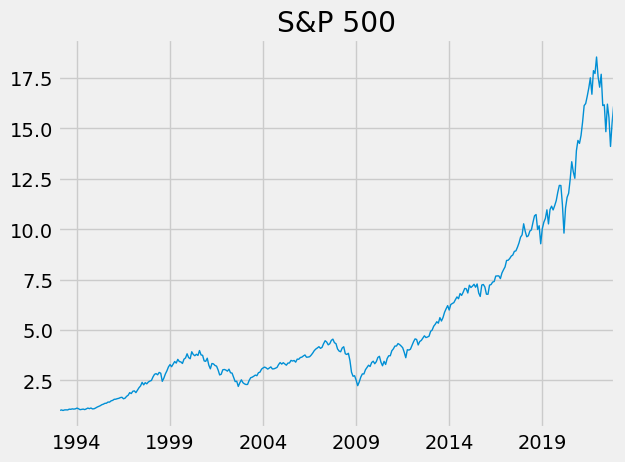

In [7]:
(1 + sp500.pct_change()).cumprod().plot(title='S&P 500', lw=1)

In [8]:
Metric(portfolio=(1 + sp500.pct_change()).cumprod(), freq='month').print_report()

Annualized Return: 9.45%
Annualized Volatility: 14.94%
Skewness: -0.58
Kurtosis: 0.99
Max Drawdown: -50.78%
Max Drawdown Duration: 2252 days
Annualized Sharp Ratio: 0.36
Annualized Sortino Ratio: -0.24
Annualized Calmar Ratio: 0.19
Annualized VaR: -0.11
Annualized VaR Ratio: 0.08
Annualized CVaR: -0.13
Annualized CVaR Ratio: 0.06
Annualized hit Ratio: 0.65
Annualized GtP Ratio: 0.90


### sp500 with market regime

### sp500 with deflation

<AxesSubplot: >

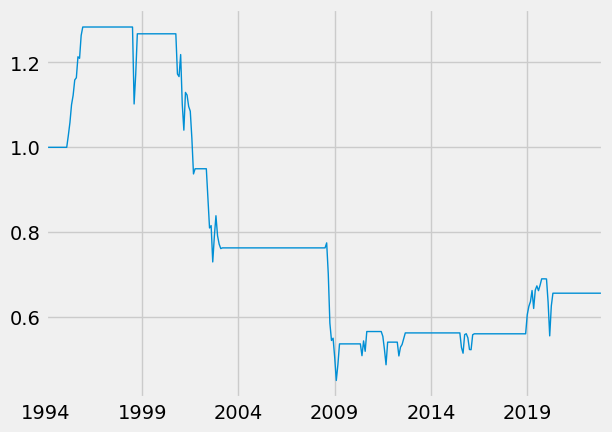

In [9]:
(1 + regime_df.sp500_rets * regime_df.deflation).cumprod().plot(lw=1)

In [10]:
Metric(portfolio=(1 + regime_df.sp500_rets * regime_df.deflation).cumprod(), freq='month').print_report()

Annualized Return: -1.44%
Annualized Volatility: 10.42%
Skewness: -0.79
Kurtosis: 8.18
Max Drawdown: -64.85%
Max Drawdown Duration: 8919 days
Annualized Sharp Ratio: -0.52
Annualized Sortino Ratio: -0.40
Annualized Calmar Ratio: -0.02
Annualized VaR: -0.11
Annualized VaR Ratio: -0.01
Annualized CVaR: -0.13
Annualized CVaR Ratio: -0.01
Annualized hit Ratio: 0.53
Annualized GtP Ratio: 0.78


### sp500 with inflation

<AxesSubplot: >

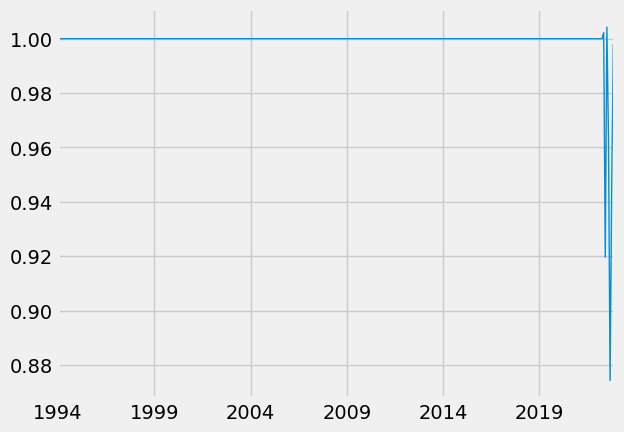

In [11]:
(1 + regime_df.sp500_rets * regime_df.inflation).cumprod().plot(lw=1)

In [12]:
Metric(portfolio=(1 + regime_df.sp500_rets * regime_df.inflation).cumprod(), freq='month').print_report()

Annualized Return: -0.21%
Annualized Volatility: 3.65%
Skewness: -0.26
Kurtosis: 58.43
Max Drawdown: -12.95%
Max Drawdown Duration: 153 days
Annualized Sharp Ratio: -1.15
Annualized Sortino Ratio: -1.14
Annualized Calmar Ratio: -0.02
Annualized VaR: -0.02
Annualized VaR Ratio: -0.01
Annualized CVaR: -0.07
Annualized CVaR Ratio: -0.00
Annualized hit Ratio: 0.50
Annualized GtP Ratio: 0.85


### sp500 with recovery

<AxesSubplot: >

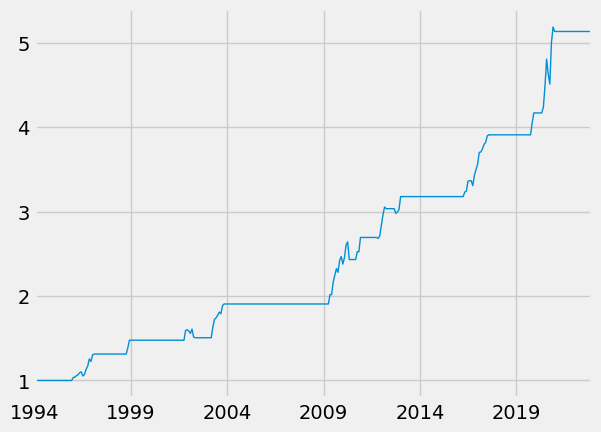

In [13]:
(1 + regime_df.sp500_rets * regime_df.recovery).cumprod().plot(lw=1)

In [14]:
Metric(portfolio=(1 + regime_df.sp500_rets * regime_df.recovery).cumprod(), freq='month').print_report()

Annualized Return: 5.80%
Annualized Volatility: 6.40%
Skewness: 1.91
Kurtosis: 8.40
Max Drawdown: -7.95%
Max Drawdown Duration: 730 days
Annualized Sharp Ratio: 0.28
Annualized Sortino Ratio: -1.19
Annualized Calmar Ratio: 0.73
Annualized VaR: -0.04
Annualized VaR Ratio: 0.13
Annualized CVaR: -0.05
Annualized CVaR Ratio: 0.09
Annualized hit Ratio: 0.78
Annualized GtP Ratio: 1.40


### sp500 with expansion

<AxesSubplot: >

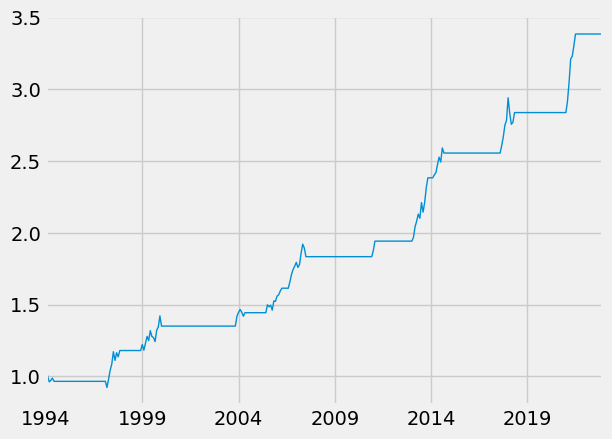

In [15]:
(1 + regime_df.sp500_rets * regime_df.expansion).cumprod().plot(lw=1)

In [16]:
Metric(portfolio=(1 + regime_df.sp500_rets * regime_df.expansion).cumprod(), freq='month').print_report()

Annualized Return: 4.17%
Annualized Volatility: 5.61%
Skewness: 1.28
Kurtosis: 4.93
Max Drawdown: -10.75%
Max Drawdown Duration: 1461 days
Annualized Sharp Ratio: 0.03
Annualized Sortino Ratio: -1.13
Annualized Calmar Ratio: 0.39
Annualized VaR: -0.04
Annualized VaR Ratio: 0.09
Annualized CVaR: -0.05
Annualized CVaR Ratio: 0.08
Annualized hit Ratio: 0.71
Annualized GtP Ratio: 1.20


- 시황 적용의 필요성 인지
- recovery인 경우 가장 성과지표가 좋았다.
- 각 국면 별 투자성과가 좋은 자산군을 찾아보자.

### 자산군
    - 주식: sp500 index
    - 장기채권: TLT ETF
    - 원자재: GSG ETF(tracking S&P GSCI index)
    - 달러: UUP index
    - 부동산: VNQ ETF


In [17]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

In [18]:
# 시차 존재해서 각각 받아서 dt로 바꾸고 합친다..

# def asset_indicators(asset_tickers):
    
#     asset_list = []
#     for ticker in asset_tickers:
#         asset_price = yf.download(ticker)['Adj Close']
#         asset_price.index = pd.to_datetime(pd.to_datetime(asset_price.index).date)
#         asset_list.append(asset_price)
#         asset_df = pd.concat(asset_list, axis=1)
    
#     asset_df.columns = asset_tickers
    
#     return asset_df

In [24]:
asset_ticker = ['SPY','TLT', 'GSG', 'VNQ', 'UUP']
asset_df = asset_indicators(asset_ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
asset_df = asset_df.loc['2008-01-01':,:].dropna().resample('M').last()

In [26]:
asset_df

,SPY,TLT,GSG,VNQ,UUP
2008-01-31,102.328529,62.151573,52.500000,32.629051,22.365519
2008-02-29,99.684097,61.868561,58.410000,31.591003,21.897978
2008-03-31,98.792694,63.191845,57.860001,33.639767,21.373192
2008-04-30,103.501366,61.620739,62.599998,35.785725,21.573566
2008-05-31,105.065941,59.964184,67.900002,35.710224,21.668980
...,...,...,...,...,...
2022-10-31,384.444611,95.170631,21.850000,81.823532,29.767994
2022-11-30,405.816467,101.976341,21.590000,86.852455,28.360384
2022-12-31,382.429993,99.304520,21.230000,82.480003,27.809999
2023-01-31,406.480011,106.894997,21.209999,91.059998,27.510000


In [27]:
ma_regime_df = pd.merge(asset_df.pct_change(), regime_df, left_index=True, right_index=True, how='left').dropna()
ma_regime_df

multi_asset_tickers = ['SPY', 'TLT', 'GSG', 'VNQ', 'UUP']

### 회복국면

<AxesSubplot: >

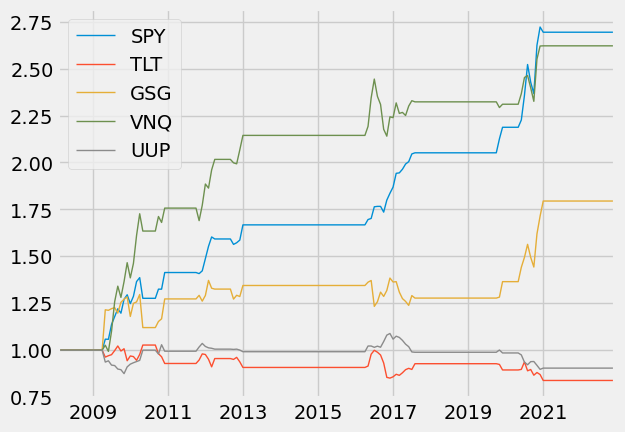

In [28]:
(1+ma_regime_df[multi_asset_tickers].mul(ma_regime_df['recovery'], axis=0)).cumprod().plot(lw=1)

In [29]:
for ticker in multi_asset_tickers:
    print(ticker)
    Metric(portfolio=(1 + ma_regime_df[ticker] * ma_regime_df.recovery).cumprod(), freq='month').print_report()
    print()

SPY
Annualized Return: 6.87%
Annualized Volatility: 6.84%
Skewness: 1.62
Kurtosis: 7.63
Max Drawdown: -7.95%
Max Drawdown Duration: 730 days
Annualized Sharp Ratio: 0.42
Annualized Sortino Ratio: -1.06
Annualized Calmar Ratio: 0.86
Annualized VaR: -0.04
Annualized VaR Ratio: 0.16
Annualized CVaR: -0.06
Annualized CVaR Ratio: 0.10
Annualized hit Ratio: 0.78
Annualized GtP Ratio: 1.39

TLT
Annualized Return: -1.17%
Annualized Volatility: 5.75%
Skewness: -0.64
Kurtosis: 7.10
Max Drawdown: -18.37%
Max Drawdown Duration: 4475 days
Annualized Sharp Ratio: -0.90
Annualized Sortino Ratio: -0.72
Annualized Calmar Ratio: -0.06
Annualized VaR: -0.05
Annualized VaR Ratio: -0.02
Annualized CVaR: -0.07
Annualized CVaR Ratio: -0.01
Annualized hit Ratio: 0.48
Annualized GtP Ratio: 0.85

GSG
Annualized Return: 4.00%
Annualized Volatility: 10.10%
Skewness: 1.92
Kurtosis: 20.24
Max Drawdown: -13.60%
Max Drawdown Duration: 1736 days
Annualized Sharp Ratio: -0.00
Annualized Sortino Ratio: -0.52
Annualized 

### 결과
     - recovery: 저성장/성장 상승 추세/저인플레이션, 저성장/성장 상승 추세/고인플레이션
     - 경제가 회복하는 국면
     - 주식과 부동산 등 위험자산이 가장 좋은 성과를 보임
     - 경제와 인플레이션이 점차 회복되어 채권금리가 상승 -> 장기채권은 불리
     - 저성장 -> 원자재 역시 횡보하는 경향을 보임
       - 예외: 코로나 이후의 급등

### 과열국면

<AxesSubplot: >

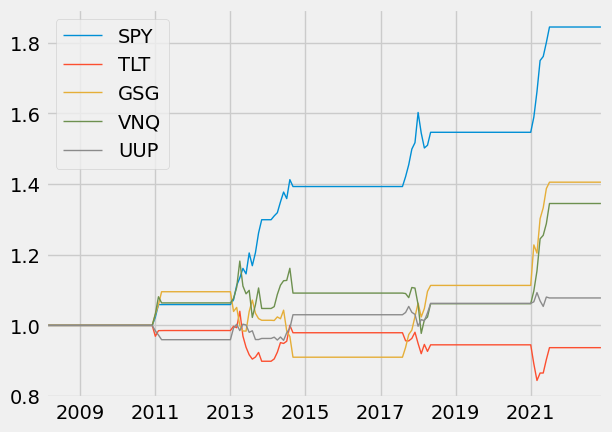

In [30]:
(1+ma_regime_df[multi_asset_tickers].mul(ma_regime_df['expansion'], axis=0)).cumprod().plot(lw=1)

In [31]:
for ticker in multi_asset_tickers:
    print(ticker)
    Metric(portfolio=(1 + ma_regime_df[ticker] * ma_regime_df.expansion).cumprod(), freq='month').print_report()
    print()

SPY
Annualized Return: 4.19%
Annualized Volatility: 4.31%
Skewness: 1.90
Kurtosis: 6.15
Max Drawdown: -6.28%
Max Drawdown Duration: 1124 days
Annualized Sharp Ratio: 0.04
Annualized Sortino Ratio: -1.93
Annualized Calmar Ratio: 0.67
Annualized VaR: -0.03
Annualized VaR Ratio: 0.13
Annualized CVaR: -0.03
Annualized CVaR Ratio: 0.11
Annualized hit Ratio: 0.83
Annualized GtP Ratio: 1.17

TLT
Annualized Return: -0.44%
Annualized Volatility: 4.46%
Skewness: -0.97
Kurtosis: 10.10
Max Drawdown: -18.84%
Max Drawdown Duration: 3532 days
Annualized Sharp Ratio: -0.99
Annualized Sortino Ratio: -0.91
Annualized Calmar Ratio: -0.02
Annualized VaR: -0.05
Annualized VaR Ratio: -0.01
Annualized CVaR: -0.06
Annualized CVaR Ratio: -0.00
Annualized hit Ratio: 0.54
Annualized GtP Ratio: 0.75

GSG
Annualized Return: 2.31%
Annualized Volatility: 5.84%
Skewness: 1.50
Kurtosis: 12.31
Max Drawdown: -16.92%
Max Drawdown Duration: 1885 days
Annualized Sharp Ratio: -0.29
Annualized Sortino Ratio: -0.93
Annualized

### 결과
      - expansion: 고성장/성장 상승 추세/고인플레이션, 고성장/성장 하락 추세/고인플레이션
      - 경기가 피크를 찍는 국면
      - 연준은 과열을 막기 위해 긴축정책을 시행
      - 결국 경기는 점차 둔화되기 시작
      - 고성장으로 주식도 좋은 성과를 보임
      - 고성장 고인플레인션 국면 -> 원자재 주식 다음으로 좋은 성과
        - 예외: 2013년 국제원자재가격은 신흥국의 수요 둔화, 생산 호조, 달러화 강세 및 투기자금 유입 감소 등으로 전반적으로 하향 안정되는 모습
        - https://www.bok.or.kr/portal/bbs/P0000528/view.do?nttId=196279&menuNo=200434&pageIndex=

### 인플레이션 국면

<AxesSubplot: >

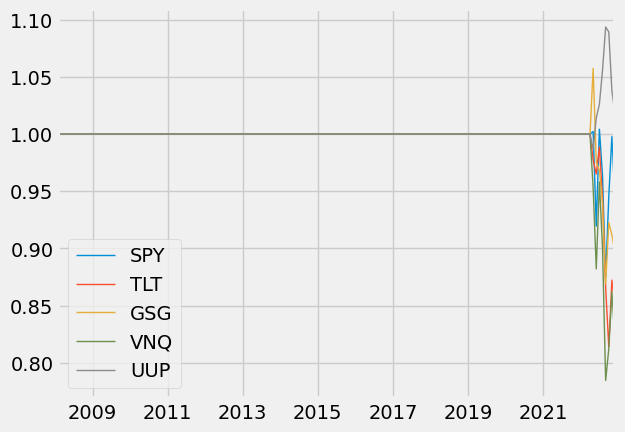

In [32]:
(1+ma_regime_df[multi_asset_tickers].mul(ma_regime_df['inflation'], axis=0)).cumprod().plot(lw=1)

In [33]:
for ticker in multi_asset_tickers:
    print(ticker)
    Metric(portfolio=(1 + ma_regime_df[ticker] * ma_regime_df.inflation).cumprod(), freq='month').print_report()
    print()

SPY
Annualized Return: -0.41%
Annualized Volatility: 5.09%
Skewness: -0.17
Kurtosis: 29.00
Max Drawdown: -12.95%
Max Drawdown Duration: 153 days
Annualized Sharp Ratio: -0.87
Annualized Sortino Ratio: -0.82
Annualized Calmar Ratio: -0.03
Annualized VaR: -0.06
Annualized VaR Ratio: -0.00
Annualized CVaR: -0.09
Annualized CVaR Ratio: -0.00
Annualized hit Ratio: 0.50
Annualized GtP Ratio: 0.85

TLT
Annualized Return: -1.09%
Annualized Volatility: 3.61%
Skewness: -2.34
Kurtosis: 40.51
Max Drawdown: -18.59%
Max Drawdown Duration: 245 days
Annualized Sharp Ratio: -1.41
Annualized Sortino Ratio: -1.01
Annualized Calmar Ratio: -0.06
Annualized VaR: -0.05
Annualized VaR Ratio: -0.02
Annualized CVaR: -0.07
Annualized CVaR Ratio: -0.01
Annualized hit Ratio: 0.25
Annualized GtP Ratio: 1.15

GSG
Annualized Return: -0.73%
Annualized Volatility: 3.68%
Skewness: -2.20
Kurtosis: 39.56
Max Drawdown: -17.81%
Max Drawdown Duration: 214 days
Annualized Sharp Ratio: -1.29
Annualized Sortino Ratio: -1.03
Ann

In [34]:
ma_regime_df[ma_regime_df.inflation != 0]

,SPY,TLT,GSG,VNQ,UUP,sp500_rets,deflation,inflation,recovery,expansion
2022-05-31,0.002257,-0.022533,0.057432,-0.046854,-0.013058,0.002257,0.0,1.0,0.0,0.0
2022-06-30,-0.082460,-0.012746,-0.077476,-0.074489,0.027563,-0.082460,0.0,1.0,0.0,0.0
2022-07-31,0.092087,0.024310,-0.007359,0.086160,0.011803,0.092087,0.0,1.0,0.0,0.0
2022-08-31,-0.040802,-0.045531,-0.029655,-0.060125,0.028985,-0.040802,0.0,1.0,0.0,0.0
2022-09-30,-0.092446,-0.082351,-0.075056,-0.128713,0.035726,-0.092446,0.0,1.0,0.0,0.0
2022-10-31,0.081276,-0.059644,0.061710,0.035051,-0.003980,0.081276,0.0,1.0,0.0,0.0
2022-11-30,0.055592,0.071511,-0.011899,0.061461,-0.047286,0.055592,0.0,1.0,0.0,0.0
2022-12-31,-0.057628,-0.026200,-0.016674,-0.050343,-0.019407,-0.057628,0.0,1.0,0.0,0.0


In [35]:
ma_regime_df.inflation.iloc[-8:]
ma_regime_df.iloc[-8:]

,SPY,TLT,GSG,VNQ,UUP,sp500_rets,deflation,inflation,recovery,expansion
2022-05-31,0.002257,-0.022533,0.057432,-0.046854,-0.013058,0.002257,0.0,1.0,0.0,0.0
2022-06-30,-0.082460,-0.012746,-0.077476,-0.074489,0.027563,-0.082460,0.0,1.0,0.0,0.0
2022-07-31,0.092087,0.024310,-0.007359,0.086160,0.011803,0.092087,0.0,1.0,0.0,0.0
2022-08-31,-0.040802,-0.045531,-0.029655,-0.060125,0.028985,-0.040802,0.0,1.0,0.0,0.0
2022-09-30,-0.092446,-0.082351,-0.075056,-0.128713,0.035726,-0.092446,0.0,1.0,0.0,0.0
2022-10-31,0.081276,-0.059644,0.061710,0.035051,-0.003980,0.081276,0.0,1.0,0.0,0.0
2022-11-30,0.055592,0.071511,-0.011899,0.061461,-0.047286,0.055592,0.0,1.0,0.0,0.0
2022-12-31,-0.057628,-0.026200,-0.016674,-0.050343,-0.019407,-0.057628,0.0,1.0,0.0,0.0


### 결과
    - inflation: 저성장/성장 하락 추세/고인플레이션
    - 높은 인플레이션 유지되고 있지만 성장이 둔화 또는 침체되는 국면
    - 연준은 높은 인플레이션을 제어하기 위해 공적적으로 기준금리를 인상하게 되고 경기 둔화 폭이 확대
    - 높은 인플레이션으로 인해 원자재 가격이 일시적으로 크게 상승할 수 있지만 경기 둔화로 인한 수요 감소 폭이 커질 경우 급격한 조정을 받는다.
    - 달러 인덱스만 수익 발생 -> 회복기에서 상승, 후퇴기에 하락, 위축기에 상승. 하지만 달러는 안전자산의 역할도 하기 때문에 경제 위축기에 상승하는 모습을 보이기도 한다.  

### 위축국면

<AxesSubplot: >

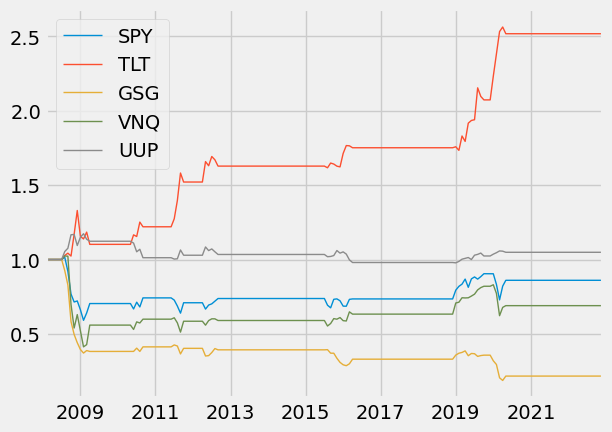

In [36]:
(1+ma_regime_df[multi_asset_tickers].mul(ma_regime_df['deflation'], axis=0)).cumprod().plot(lw=1)

In [37]:
for ticker in multi_asset_tickers:
    print(ticker)
    Metric(portfolio=(1 + ma_regime_df[ticker] * ma_regime_df.deflation).cumprod(), freq='month').print_report()
    print()

SPY
Annualized Return: -1.00%
Annualized Volatility: 11.60%
Skewness: -0.50
Kurtosis: 7.04
Max Drawdown: -41.80%
Max Drawdown Duration: 5235 days
Annualized Sharp Ratio: -0.43
Annualized Sortino Ratio: -0.37
Annualized Calmar Ratio: -0.02
Annualized VaR: -0.11
Annualized VaR Ratio: -0.00
Annualized CVaR: -0.15
Annualized CVaR Ratio: -0.00
Annualized hit Ratio: 0.54
Annualized GtP Ratio: 0.81

TLT
Annualized Return: 6.39%
Annualized Volatility: 10.12%
Skewness: 1.88
Kurtosis: 10.28
Max Drawdown: -17.13%
Max Drawdown Duration: 1248 days
Annualized Sharp Ratio: 0.24
Annualized Sortino Ratio: -0.65
Annualized Calmar Ratio: 0.37
Annualized VaR: -0.05
Annualized VaR Ratio: 0.12
Annualized CVaR: -0.10
Annualized CVaR Ratio: 0.06
Annualized hit Ratio: 0.54
Annualized GtP Ratio: 2.58

GSG
Annualized Return: -9.76%
Annualized Volatility: 16.64%
Skewness: -2.74
Kurtosis: 16.03
Max Drawdown: -81.33%
Max Drawdown Duration: 5266 days
Annualized Sharp Ratio: -0.83
Annualized Sortino Ratio: -0.31
Annu

### 결과
    - deflation: 저성장/성장 하락 추세/저인플레이션
    - 성장과 인플레이션이 모두 낮게 유지되는 국면
    - 위축 국면이 길어질수록 급격한 수요 감소와 디레버리징이 나타나게 되고 경기침체가 발생
    - 모든 위험 자산 가격이 크게 하락
    - 안전사잔인 장기채권과 달러가 가장 좋은 성과를 보임

### 종합
    - 회복국면
      - buy 주식, 부동산
      - sell 장기채권
    - 과열국면
      - buy 주식, 원자재
      - sell 장기 채권
    - 인플레이션
      - buy 달러
      - sell 주식
    - 위축국면
      - buy 장기채권
      - sell 주식, 부동산, 원자재
    
    - 추가 인사이트
      - 원자재는 거시경제의 영향과 수요와 공급(미시경제)의 영향 역시 많이 받는다. 
      -> 신문,기사 등의 영향을 추가하기 위해 NLP 사용해볼 수 있듯  

### 마지막으로 각 국면별 성과가 가장 좋은 자산군에 투자한다고 가정하고 백테스트 진행해보자

In [38]:
ma_regime_df

,SPY,TLT,GSG,VNQ,UUP,sp500_rets,deflation,inflation,recovery,expansion
2008-02-29,-0.025843,-0.004554,0.112571,-0.031814,-0.020905,-0.025843,0.0,0.0,0.0,0.0
2008-03-31,-0.008942,0.021389,-0.009416,0.064853,-0.023965,-0.008942,0.0,0.0,0.0,0.0
2008-04-30,0.047662,-0.024862,0.081922,0.063792,0.009375,0.047662,0.0,0.0,0.0,0.0
2008-05-31,0.015116,-0.026883,0.084665,-0.002110,0.004423,0.015116,0.0,0.0,0.0,0.0
2008-06-30,-0.083576,0.026537,0.103240,-0.106154,-0.009687,-0.083576,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.040802,-0.045531,-0.029655,-0.060125,0.028985,-0.040802,0.0,1.0,0.0,0.0
2022-09-30,-0.092446,-0.082351,-0.075056,-0.128713,0.035726,-0.092446,0.0,1.0,0.0,0.0
2022-10-31,0.081276,-0.059644,0.061710,0.035051,-0.003980,0.081276,0.0,1.0,0.0,0.0
2022-11-30,0.055592,0.071511,-0.011899,0.061461,-0.047286,0.055592,0.0,1.0,0.0,0.0


<AxesSubplot: >

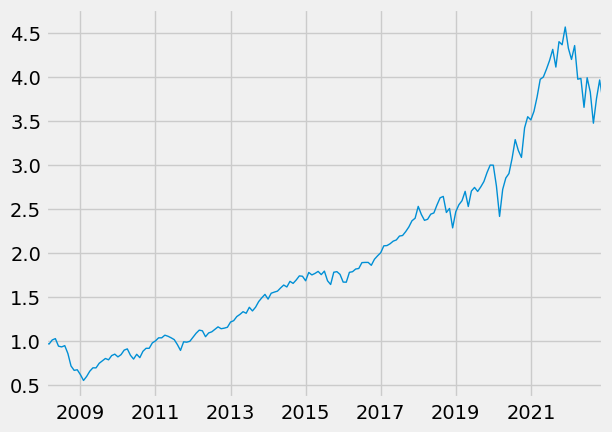

In [39]:
(1 + ma_regime_df['SPY']).cumprod().plot(lw=1)

In [40]:
Metric(portfolio=(1 + ma_regime_df['SPY']).cumprod(), freq='month').print_report()

Annualized Return: 9.43%
Annualized Volatility: 16.21%
Skewness: -0.61
Kurtosis: 0.95
Max Drawdown: -46.32%
Max Drawdown Duration: 975 days
Annualized Sharp Ratio: 0.34
Annualized Sortino Ratio: -0.21
Annualized Calmar Ratio: 0.20
Annualized VaR: -0.11
Annualized VaR Ratio: 0.08
Annualized CVaR: -0.15
Annualized CVaR Ratio: 0.06
Annualized hit Ratio: 0.67
Annualized GtP Ratio: 0.81


In [41]:
print(len(ma_regime_df.loc[(ma_regime_df.recovery == 1)]['SPY']))
print(len(ma_regime_df.loc[(ma_regime_df.expansion == 1)]['SPY']))
print(len(ma_regime_df.loc[(ma_regime_df.deflation == 1)]['TLT']))
print(len(ma_regime_df.loc[(ma_regime_df.inflation == 1)]['UUP']))

52
35
46
8


In [42]:
best_regime = pd.concat([
                        ma_regime_df.loc[(ma_regime_df.recovery == 1)]['SPY'], 
                        ma_regime_df.loc[(ma_regime_df.expansion == 1)]['SPY'],
                        ma_regime_df.loc[(ma_regime_df.deflation == 1)]['TLT'],
                        ma_regime_df.loc[(ma_regime_df.inflation == 1)]['UUP'],
                        ], ignore_index=False, axis=0)

best_regime

2009-05-31    0.058453
2009-06-30   -0.000655
2009-07-31    0.074605
2009-08-31    0.036940
2009-09-30    0.035458
                ...   
2022-08-31    0.028985
2022-09-30    0.035726
2022-10-31   -0.003980
2022-11-30   -0.047286
2022-12-31   -0.019407
Length: 141, dtype: float64

In [43]:
type(best_regime.index)
type(ma_regime_df.index)

best_regime.index = pd.to_datetime(best_regime.index)
best_regime.index

DatetimeIndex(['2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
               '2010-01-31', '2010-02-28',
               ...
               '2020-04-30', '2020-05-31', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', length=141, freq=None)

In [44]:
not_explained = ma_regime_df.index.difference(best_regime.index)
not_explained

DatetimeIndex(['2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
               '2008-06-30', '2008-07-31', '2011-04-30', '2011-05-31',
               '2011-06-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', freq=None)

In [45]:
not_explained = ma_regime_df.index.difference(best_regime.index)
not_explained_df = pd.Series({'port_val':0}, index=not_explained)

In [46]:
total_regime = best_regime.append(not_explained_df).sort_index().fillna(0)

/var/folders/6m/p0mfz7q566zcnpddq0xg_r740000gn/T/ipykernel_32819/2470937050.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_regime = best_regime.append(not_explained_df).sort_index().fillna(0)


<AxesSubplot: >

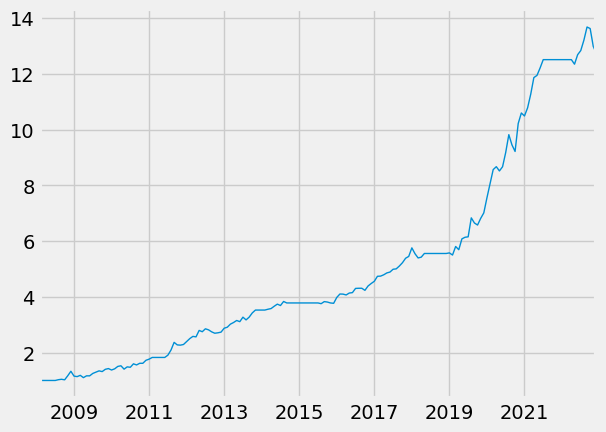

In [47]:
(1 + total_regime).cumprod().plot(lw=1)

In [48]:
Metric(portfolio=(1 + total_regime).cumprod(), freq='month').print_report()

Annualized Return: 18.60%
Annualized Volatility: 12.41%
Skewness: 0.53
Kurtosis: 2.98
Max Drawdown: -17.13%
Max Drawdown Duration: 487 days
Annualized Sharp Ratio: 1.18
Annualized Sortino Ratio: -0.39
Annualized Calmar Ratio: 1.09
Annualized VaR: -0.07
Annualized VaR Ratio: 0.21
Annualized CVaR: -0.11
Annualized CVaR Ratio: 0.14
Annualized hit Ratio: 0.70
Annualized GtP Ratio: 1.63


In [49]:
total_regime.to_csv('total_regime.csv')

- 모멘텀 팩터가 좋은지 판단 => recovery일 때 모멘텀 적용해보고 성과지표 변화 확인

### apply dual momentum --> 다른 파일에 하자

In [ ]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers_list = [s.replace('\n', '') for s in tickers]

start = datetime.datetime(1993,1,1)
end = datetime.datetime(2022,12,31)
df = yf.download(tickers_list, start=start, end=end)
sp_price = df['Adj Close']

sp_price.index = pd.to_datetime(pd.to_datetime(sp_price.index).date)
sp_price.index.name = 'date_time'

sp_price

[**********************69%********               ]  345 of 503 completed

KeyboardInterrupt: 

[**********************69%********               ]  346 of 503 completed

[*********************100%***********************]  502 of 503 completed

In [ ]:
# FAANG: facebook, amazon, apple, facebook, netflix, google 등 빅테크 기업 추가를 위한 날짜 조회
print(sp_price['GOOG'].dropna().first_valid_index())
print(sp_price['AMZN'].dropna().first_valid_index())
print(sp_price['AAPL'].dropna().first_valid_index())
print(sp_price['NFLX'].dropna().first_valid_index())
print(sp_price['META'].dropna().first_valid_index())
print(sp_price['TSLA'].dropna().first_valid_index())

2004-08-19 00:00:00
1997-05-15 00:00:00
1993-01-04 00:00:00
2002-05-23 00:00:00
2012-05-18 00:00:00
2010-06-29 00:00:00


In [ ]:
sp_price2 = sp_price.loc['2013-01-02':,]
sp_price2.index = pd.to_datetime(sp_price2.index)
sp_price2

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date_time,,,,,,,,,,,,,,,,,,,,,
2013-01-02,27.435246,13.179525,67.488403,16.862827,23.105900,37.189934,26.401577,14.793333,57.290287,38.340000,...,96.279900,19.881603,58.083363,37.638943,24.058147,39.864059,60.554222,40.959999,18.467670,NaN
2013-01-03,27.533510,12.877850,67.488403,16.649973,22.915113,37.112984,27.406574,14.750000,57.082882,37.750000,...,97.315521,19.823513,57.978600,37.536755,23.979410,40.113365,61.421856,41.000000,18.492868,NaN
2013-01-04,28.077236,13.886580,68.540474,16.186205,22.625622,37.360962,27.241819,14.876667,57.398144,38.130001,...,98.489777,19.896124,58.247051,37.861874,23.944420,40.552597,61.734905,40.669998,19.021946,NaN
2013-01-07,27.874159,13.990281,68.307709,16.090988,22.671684,37.480679,27.464239,14.730000,57.149261,37.939999,...,98.824104,19.685543,57.572666,37.991940,23.629478,40.297367,61.886948,40.900002,18.929577,NaN
2013-01-08,27.651426,14.291961,67.190475,16.134289,22.178247,37.429386,27.472473,14.750000,57.481083,38.139999,...,98.742554,19.721849,57.932781,37.555347,23.340776,38.605705,61.976395,40.930000,18.551653,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,149.007767,12.710000,143.279999,131.860001,161.564163,170.009995,107.692398,63.380001,265.006012,338.450012,...,80.720001,70.446365,108.680000,31.701571,109.730003,128.899994,126.690002,248.220001,48.450001,145.418304
2022-12-27,149.327301,12.530000,145.020004,130.029999,161.455200,169.000000,108.080643,63.619999,264.229187,335.089996,...,84.330002,71.082001,110.190002,31.940601,110.720001,129.899994,127.279999,251.000000,48.840000,144.959396
2022-12-28,147.869461,12.320000,145.300003,126.040001,160.702347,167.360001,107.343979,62.599998,262.048126,328.329987,...,80.089996,70.570000,108.379997,30.855000,108.940002,129.309998,125.989998,246.839996,47.970001,143.492844


In [ ]:
sp_price.index = pd.to_datetime(sp_price.index)
rebal_price_df = sp_price2.resample('M').last()
rebal_price_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date_time,,,,,,,,,,,,,,,,,,,,,
2013-01-31,29.335011,13.462347,68.447372,13.989851,24.426201,38.797596,28.024977,15.473333,59.637962,37.830002,...,102.110352,20.172054,58.908363,38.790783,24.434332,38.745911,66.725937,43.279999,19.584637,NaN
2013-02-28,27.173201,12.661019,71.072777,13.636105,24.579315,40.543816,27.950533,16.373333,61.687031,39.310001,...,96.100204,20.840101,59.007957,38.474953,24.156574,39.068092,67.047897,44.720001,20.289976,31.157911
2013-03-31,27.572815,15.998322,77.005119,13.675030,27.149096,44.194473,29.216124,17.523333,63.022644,43.520000,...,102.890511,21.769625,59.376949,39.482128,24.209272,42.922409,67.465538,47.130001,20.995707,31.111326
2013-04-30,27.224621,15.932330,78.151093,13.678736,30.941303,46.487934,30.655306,17.686666,68.286186,45.080002,...,112.870468,23.301556,58.638943,39.398403,24.376177,40.848114,68.568733,46.650002,20.684851,30.818750
2013-05-31,29.859045,16.563963,75.952301,13.985403,28.683701,46.631611,30.447708,17.070000,68.847961,42.910000,...,112.522728,21.051298,60.026566,38.849518,24.818272,40.626240,70.416351,45.660000,23.617525,29.866741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,127.837769,12.990000,165.404633,156.959625,131.852203,146.110657,101.707428,45.720001,286.013000,373.440002,...,60.590000,73.264412,94.826622,32.500786,90.857346,110.732498,105.881897,301.640015,54.585072,155.831940
2022-09-30,121.159309,12.040000,154.705322,137.971115,131.607056,134.915085,95.871513,45.540001,255.117310,275.200012,...,63.029999,63.563618,86.612747,28.235611,87.127304,105.854851,104.352104,262.010010,50.448788,147.628677
2022-10-31,138.143982,14.180000,187.934219,153.086044,145.021408,156.737976,98.494049,57.500000,282.743469,318.500000,...,63.900002,64.666046,109.925072,30.695644,102.157166,117.710518,113.135445,283.220001,51.520054,150.426544


In [ ]:
# 제작한 모듈들 임포트
from price.price_processing import *

from backtest.metric import Metric
from strategy.factors.momentum import *
from strategy.optimize.cross_sectional import *
from strategy.optimize.time_series import *

In [ ]:
momentum = MomentumFactor(rebal_price=rebal_price_df, lookback_window=12, n_sel=5, long_only=True)
signal = momentum.dual_momentum()
signal

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date_time,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-05-31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cs_weight = Equalizer(signal=signal, rebal_price=rebal_price_df, param=12)
beta_weight = cs_weight.beta()
ew_weight = cs_weight.ew()
emv_weight = cs_weight.emv()

In [ ]:
ew_weight.sum(axis=1) * 

date_time
2014-01-31    1.0
2014-02-28    1.0
2014-03-31    1.0
2014-04-30    1.0
2014-05-31    1.0
             ... 
2022-08-31    1.0
2022-09-30    1.0
2022-10-31    1.0
2022-11-30    1.0
2022-12-31    1.0
Freq: M, Length: 108, dtype: float64

In [ ]:
cs_model = {'BETA': beta_weight,
            'EW': ew_weight, 
            #'EMV': emv_weight, 
            #'MSR': msr_weight, 
            #'GMV': gmv_weight, 
            #'MDP': mdp_weight, 
            #'RP': rp_weight
            }

In [ ]:
for name, weight in cs_model.items():
    print(name)
    cum_rets = port_cum_rets(calculate_portvals(price_df=sp_price2, weight_df=weight, signal_df=signal, long_only=True))
    #display(Metric(cum_rets).rolling_metric()['dd'].plot())
    #plt.show()
    Metric(portfolio=cum_rets).print_report()
    print()

BETA
Annualized Return: -17.47%
Annualized Volatility: 21.59%
Skewness: -1.08
Kurtosis: 11.29
Max Drawdown: -88.73%
Max Drawdown Duration: 3227 days
Annualized Sharp Ratio: -0.99
Annualized Sortino Ratio: -0.37
Annualized Calmar Ratio: -0.20
Annualized VaR: -0.05
Annualized VaR Ratio: -0.01
Annualized CVaR: -0.06
Annualized CVaR Ratio: -0.01
Annualized hit Ratio: 0.53
Annualized GtP Ratio: 0.77

EW
Annualized Return: 44.53%
Annualized Volatility: 36.97%
Skewness: -0.12
Kurtosis: 4.43
Max Drawdown: -49.05%
Max Drawdown Duration: 273 days
Annualized Sharp Ratio: 1.10
Annualized Sortino Ratio: 0.31
Annualized Calmar Ratio: 0.91
Annualized VaR: -0.06
Annualized VaR Ratio: 0.03
Annualized CVaR: -0.08
Annualized CVaR Ratio: 0.02
Annualized hit Ratio: 0.55
Annualized GtP Ratio: 1.03

